##### Pandas analysis

In the following a series of exercises is proposed on a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGA's. Each measurement (i.e. each row) consists of the address of the TDC providing the signal, 'FPGA' and 'TDC_Channel, and the timing information itself, 'ORBIT_CNT', 'BX_COUNTER' and 'TDC_MEAS'. Each TDC count correspond 25/30 ns, whereas the BX_COUNTER feauters gets updated every 25 ns and the ORBIT_CNT every 'x' BX_COUNTER. You can see these way of storing the time as similar to hours, minutes and seconds.

1\. Create a Pandas DataFrame by read N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the value of 'x'

3\. Find out how much the data taking lasted. You can either make an estimate on the basis of the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset

4\. Create a new column with the actual time in ns (as a combination of the other three columns with timing information)

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1

6\. Create a new DataFrame with only the rows with HEAD=1

7\. Make two occupancy plots (one per FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
N = 1e5
#d = np.genfromtxt('/home/philipp/Studium/LabCourse_ComputationalPhysics/ModulA/Data/data_000637.dat')
#df = pd.DataFrame('/home/philipp/Studium/LabCourse_ComputationalPhysics/ModulA/Data/data_000637.dat')
file = '/home/philipp/Studium/LabCourse_ComputationalPhysics/ModulA/Data/data_000637.txt'
d = pd.read_csv(file, nrows=N)
d.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25


In [23]:
t_tdc = 25/30 * 10**(-9)
t_counter = 25 * 10**(-9)

In [41]:
x=d['BX_COUNTER'].max()

As the maximal value of *BX_COUNTER* is $3563$, I assume that $x = 3563$

In [40]:
d_full = pd.read_csv(file)
d_full.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25


In [44]:
t = (d_full['ORBIT_CNT'].max() - d_full['ORBIT_CNT'].min()) * x * t_counter
t

0.9801813

If the previous results are correct, the total measurement time should be around $1$ s

Creating the extra column with the time

In [45]:
d_full['Time'] = (d_full['ORBIT_CNT'] - d_full['ORBIT_CNT'].min())*x + d_full['BX_COUNTER']*25 + d_full['TDC_MEAS']*25/30

Setting 'HEAD' randomly to 0 or 1

In [62]:
d_full['HEAD'] = np.random.randint(2, size=d_full.shape[0])

Keeping only the events with 'HEAD' == 1

In [67]:
d_filtered = d_full[d_full['HEAD']==1]
d_filtered.shape

(655467, 7)

In [69]:
d_0 = d_full[d_full['FPGA']==0]
d_1 = d_full[d_full['FPGA']==1]

In [97]:
count0 = d_0['TDC_CHANNEL'].value_counts().reset_index().sort_values('index')
count1 = d_1['TDC_CHANNEL'].value_counts().reset_index().sort_values('index')
type(count0)
# The column names in count0 and count1 are not correct but if one keeps that in mind it should be fine

pandas.core.frame.DataFrame

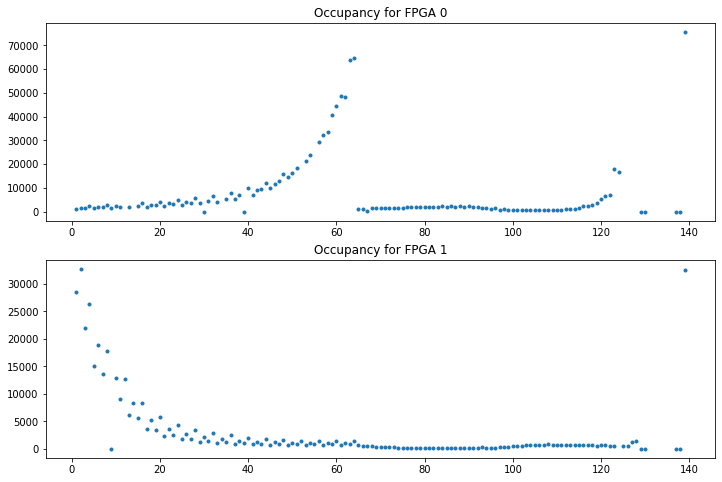

In [95]:
fig, ax = plt.subplots(2,1, figsize=(12,8))
ax[0].plot(count0['index'], count0['TDC_CHANNEL'], ls='', marker='.')
ax[0].set_title("Occupancy for FPGA 0")
ax[1].plot(count1['index'], count1['TDC_CHANNEL'], ls='', marker='.')
ax[1].set_title("Occupancy for FPGA 1")
plt.show()

In [99]:
count0.sort_values('TDC_CHANNEL').tail()

,index,TDC_CHANNEL
4,62,48275
3,61,48699
2,63,63724
1,64,64581
0,139,75617


In [100]:
count1.sort_values('TDC_CHANNEL').tail()

,index,TDC_CHANNEL
4,3,21970
3,4,26403
2,1,28438
1,139,32442
0,2,32669


We can see the most occurances in Channel 139 (FPGA=0), followed by Channel 64 and 63 (both with FPGA=0)
Again, the column names are confusing: index should be called TDC_Channel and "TDC_Channel" should be the occurance

__Counting the unique orbits:__

In [102]:
d_full['ORBIT_CNT'].nunique()

11001

__Counting unique orbits with TDC ==139__

In [103]:
d_full[d_full['TDC_CHANNEL']==139]['ORBIT_CNT'].nunique()

10976